# KC House 

## Primeras librerías

In [ ]:
import requests
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_path = Path('data/')
data_path.mkdir(parents=True, exist_ok=True)

with open(data_path / 'houses.csv', 'wb') as f:
  request = requests.get('https://github.com/gvalverd/MLUCM2223/raw/main/Data/kc_house_data.csv')
  f.write(request.content)

In [ ]:
df = pd.read_csv('data/houses.csv').drop(['id', 'zipcode'], axis = 1) #Eliminamos el zipcode ya que es un valor númerico y por localización disponemos de la latitud y longitud 
df['date'] = pd.to_datetime(df['date']) #Lo pasamos a tipo fecha

## EDA

Comenzamos con visualizaciones básicas y descriptivas de los datos

In [ ]:
df

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-10-13  221900.0         3       1.00         1180      5650   
1     2014-12-09  538000.0         3       2.25         2570      7242   
2     2015-02-25  180000.0         2       1.00          770     10000   
3     2014-12-09  604000.0         4       3.00         1960      5000   
4     2015-02-18  510000.0         3       2.00         1680      8080   
...          ...       ...       ...        ...          ...       ...   
21608 2014-05-21  360000.0         3       2.50         1530      1131   
21609 2015-02-23  400000.0         4       2.50         2310      5813   
21610 2014-06-23  402101.0         2       0.75         1020      1350   
21611 2015-01-16  400000.0         3       2.50         1600      2388   
21612 2014-10-15  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0         1.0           0     0          3      7        1180              0   
1         2.0           0     0          3      7        2170            400   
2         1.0           0     0          3      6         770              0   
3         1.0           0     0          5      7        1050            910   
4         1.0           0     0          3      8        1680              0   
...       ...         ...   ...        ...    ...         ...            ...   
21608     3.0           0     0          3      8        1530              0   
21609     2.0           0     0          3      8        2310              0   
21610     2.0           0     0          3      7        1020              0   
21611     2.0           0     0          3      8        1600              0   
21612     2.0           0     0          3      7        1020              0   

       yr_built  yr_renovated      lat     long  sqft_living15  sqft_lot15  
0          1955             0  47.5112 -122.257           1340        5650  
1          1951          1991  47.7210 -122.319           1690        7639  
2          1933             0  47.7379 -122.233           2720        8062  
3          1965             0  47.5208 -122.393           1360        5000  
4          1987             0  47.6168 -122.045           1800        7503  
...         ...           ...      ...      ...            ...         ...  
21608      2009             0  47.6993 -122.346           1530        1509  
21609      2014             0  47.5107 -122.362           1830        7200  
21610      2009             0  47.5944 -122.299           1020        2007  
21611      2004             0  47.5345 -122.069           1410        1287  
21612      2008             0  47.5941 -122.299           1020        1357  

[21613 rows x 19 columns]

In [ ]:
df.info() #Vemos que no hay valores missing, por lo que no los trataremos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  lat            2161

In [ ]:
df.describe().T #Estudio descriptivo básico, ¿grade dejarlo en 3? ya veremos

count           mean            std         min         25%  \
price          21613.0  540088.141767  367127.196483  75000.0000  321950.000   
bedrooms       21613.0       3.370842       0.930062      0.0000       3.000   
bathrooms      21613.0       2.114757       0.770163      0.0000       1.750   
sqft_living    21613.0    2079.899736     918.440897    290.0000    1427.000   
sqft_lot       21613.0   15106.967566   41420.511515    520.0000    5040.000   
floors         21613.0       1.494309       0.539989      1.0000       1.000   
waterfront     21613.0       0.007542       0.086517      0.0000       0.000   
view           21613.0       0.234303       0.766318      0.0000       0.000   
condition      21613.0       3.409430       0.650743      1.0000       3.000   
grade          21613.0       7.656873       1.175459      1.0000       7.000   
sqft_above     21613.0    1788.390691     828.090978    290.0000    1190.000   
sqft_basement  21613.0     291.509045     442.575043      0.0000       0.000   
yr_built       21613.0    1971.005136      29.373411   1900.0000    1951.000   
yr_renovated   21613.0      84.402258     401.679240      0.0000       0.000   
lat            21613.0      47.560053       0.138564     47.1559      47.471   
long           21613.0    -122.213896       0.140828   -122.5190    -122.328   
sqft_living15  21613.0    1986.552492     685.391304    399.0000    1490.000   
sqft_lot15     21613.0   12768.455652   27304.179631    651.0000    5100.000   

                       50%         75%           max  
price          450000.0000  645000.000  7.700000e+06  
bedrooms            3.0000       4.000  3.300000e+01  
bathrooms           2.2500       2.500  8.000000e+00  
sqft_living      1910.0000    2550.000  1.354000e+04  
sqft_lot         7618.0000   10688.000  1.651359e+06  
floors              1.5000       2.000  3.500000e+00  
waterfront          0.0000       0.000  1.000000e+00  
view                0.0000       0.000  4.000000e+00  
condition           3.0000       4.000  5.000000e+00  
grade               7.0000       8.000  1.300000e+01  
sqft_above       1560.0000    2210.000  9.410000e+03  
sqft_basement       0.0000     560.000  4.820000e+03  
yr_built         1975.0000    1997.000  2.015000e+03  
yr_renovated        0.0000       0.000  2.015000e+03  
lat                47.5718      47.678  4.777760e+01  
long             -122.2300    -122.125 -1.213150e+02  
sqft_living15    1840.0000    2360.000  6.210000e+03  
sqft_lot15       7620.0000   10083.000  8.712000e+05

Con esto nos hacemos una primera idea del dataset, observando que las variables como `price` (variable que queremos predecir) o `bedrooms` su máximo se encuentra muy disperso del resto de datos, que visualizaremos más adelante. De momento dividiremos el dataset en variables continuas y variables discretas, donde consideramos variables como `bathrooms` discretas aunque pueda tomar valores como $1.5$. Por último, el número máximo de dormitorios es 33, la persona o personas que comprasen dicha casa sabían cosas.



In [ ]:
def dsc_cont_vars(dataframe: pd.DataFrame = df, threshold: int = 50):
  '''
  Data un dataframe, decidimos cuales son discretas y continuas en base a la cantidad de valores únicos que tienen.
  ¡OJO! esta función solo es válida para datos numéricos.
'''
  dates = [col for col in dataframe.columns if dataframe[col].dtype != 'float' and dataframe[col].dtype != 'int']
  dsc = [col for col in dataframe.columns if len(dataframe[col].unique()) <= 50 and  col not in dates]
  cnt = [col for col in dataframe.columns if len(dataframe[col].unique()) > 50 and col not in dates]
  return dsc, cnt, dates

dsc_var, cnt_var, date_var = dsc_cont_vars()

def cut(alpha: float = .05, dataframe: pd.DataFrame = df):
  '''
  alpha: Selecciona el corte que se quiere realizar por arriba y por abajo de los datos.
  dataframe: Sobre que conjunto de datos quieres realizarlo.
'''
  L, U = int(len(dataframe)*alpha), int(len(dataframe)*(1-alpha)) 
  return L, U 

def plot_things(alpha: float = .05, dataframe: pd.DataFrame = df):
  L, U = cut(alpha, dataframe)
  for col in dsc_var:
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (25, 4))
    sns.violinplot(data = df, x = col, ax = axes[0], y = 'price');
    sns.violinplot(data = dataframe.sort_values(by = 'price')[L:U], x = col, ax = axes[1], y = 'price');
    axes[0].set_title(col)
    axes[1].set_title(f'{col} Without {200*alpha}% data')

  for col in cnt_var:
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (25, 4))
    sns.histplot(data = df, x = col, ax = axes[0], kde = True);
    sns.histplot(data = dataframe.sort_values(by = col)[L:U], x = col, ax = axes[1], kde = True);
    axes[0].set_title(col)
    axes[1].set_title(f'{col} Without {200*alpha}% data')

  for col in cnt_var:
      fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (25, 4))
      sns.scatterplot(data = df, x = col, y = 'price', ax = axes[0]);
      sns.scatterplot(data = dataframe.sort_values(by = col)[L:U], x = col, y = 'price', ax = axes[1]);
      axes[0].set_title(col)
      axes[1].set_title(f'{col} Without {200*alpha}% data')

  fig.tight_layout()

<ipython-input-30-f3ce0bb7e4fb>:38: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



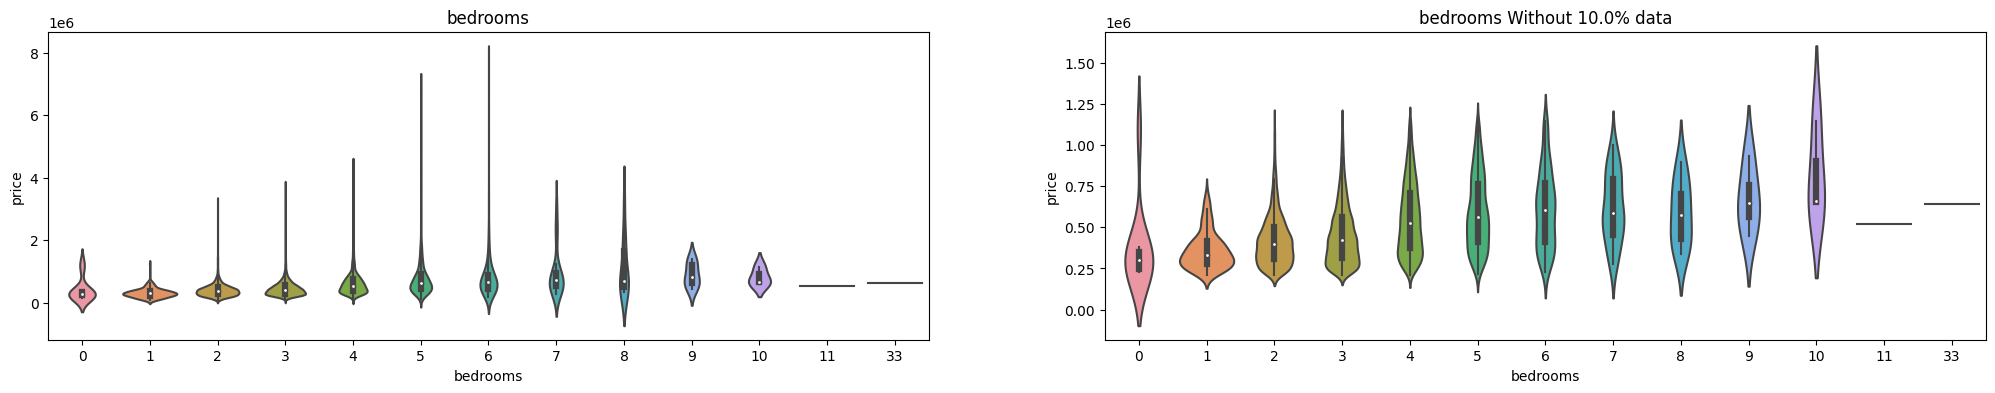

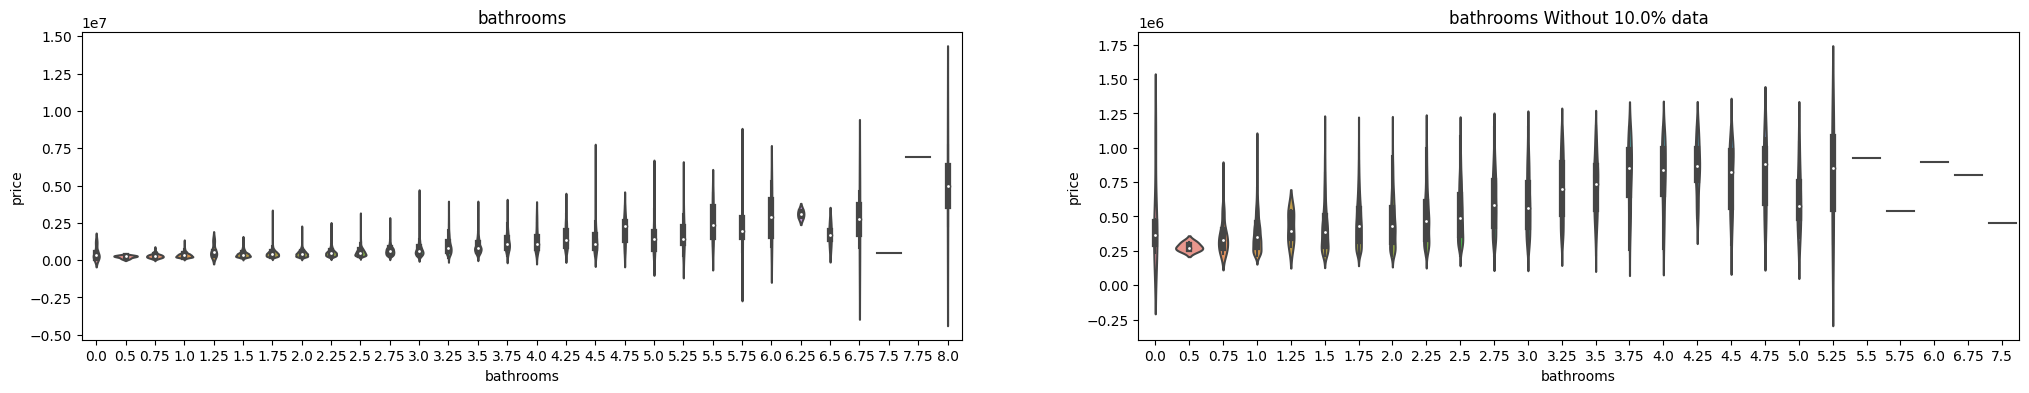

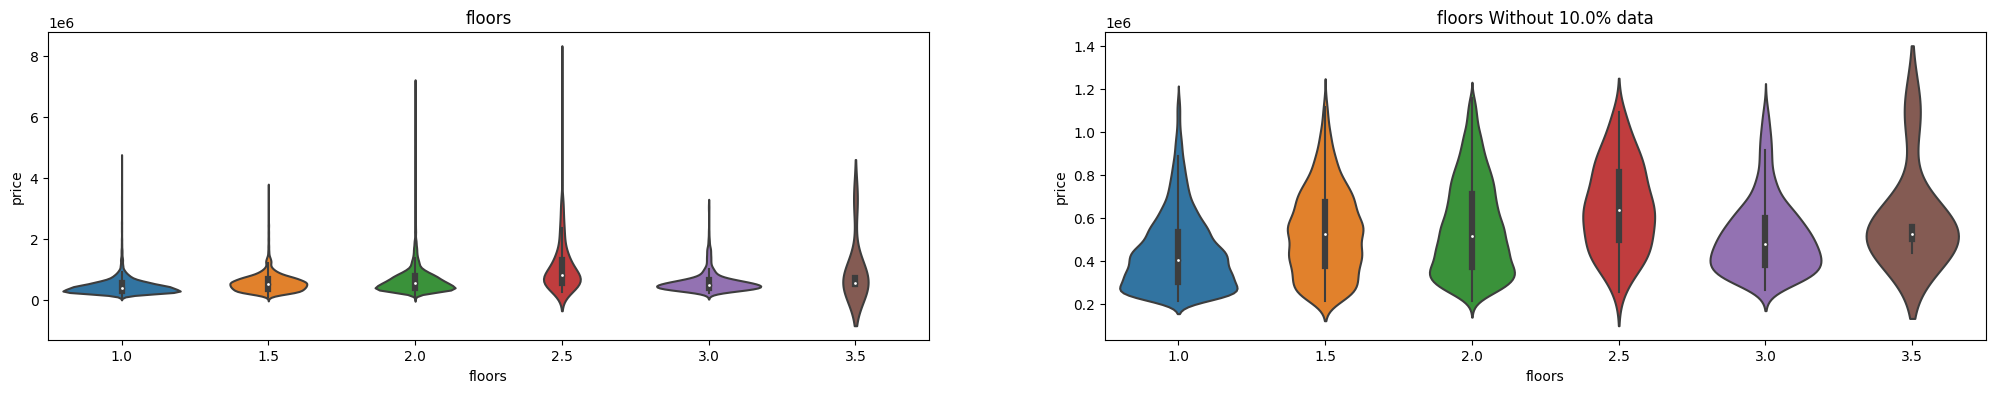

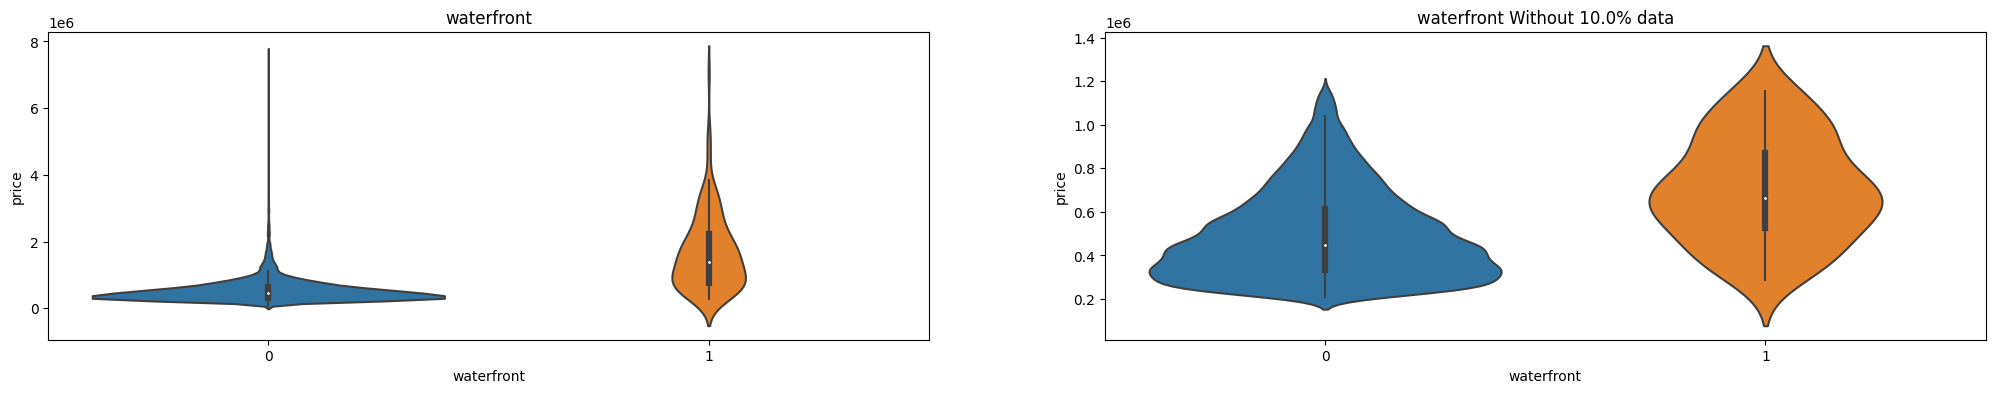

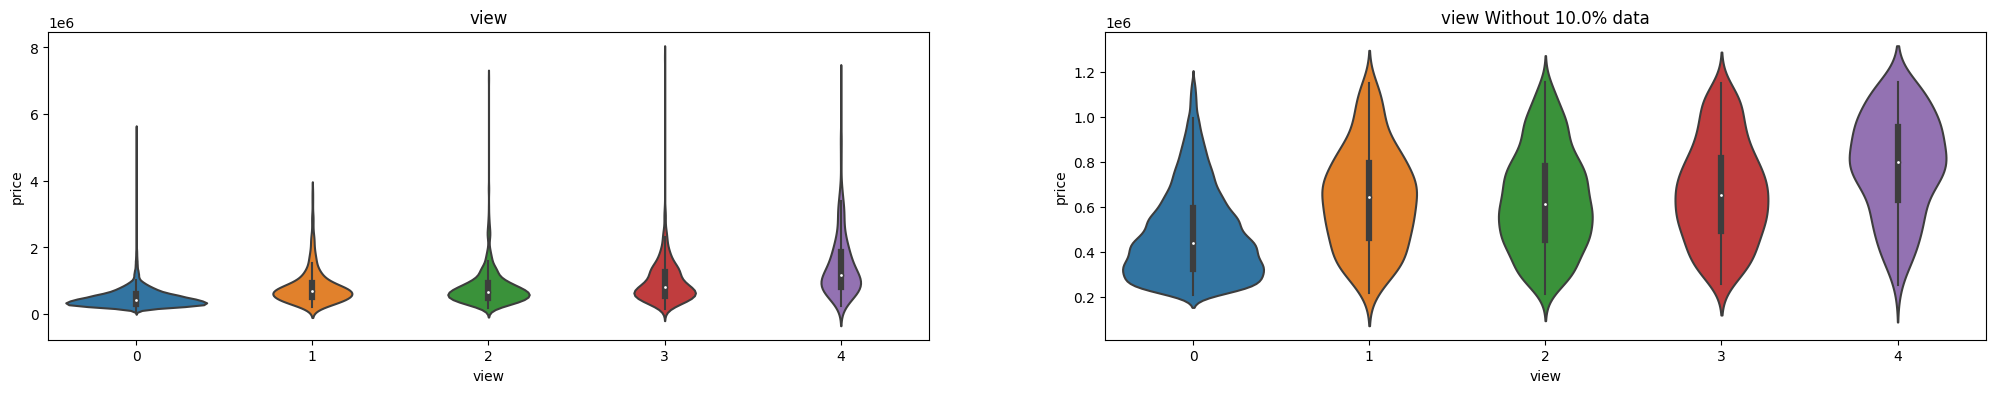

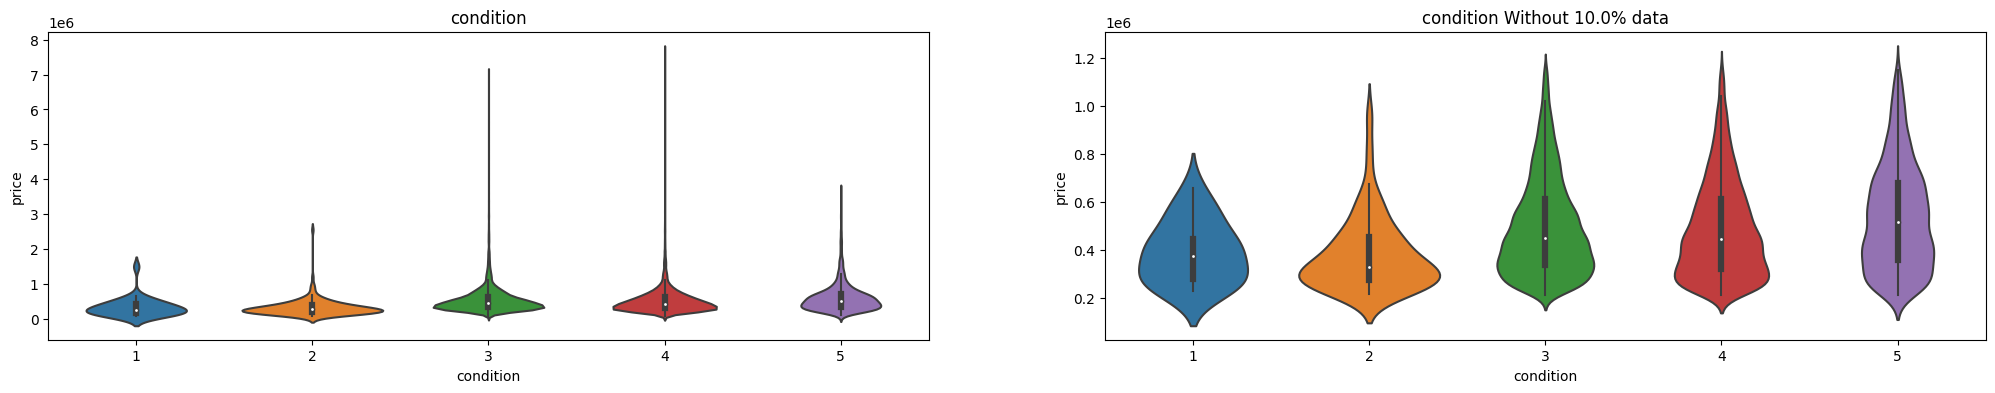

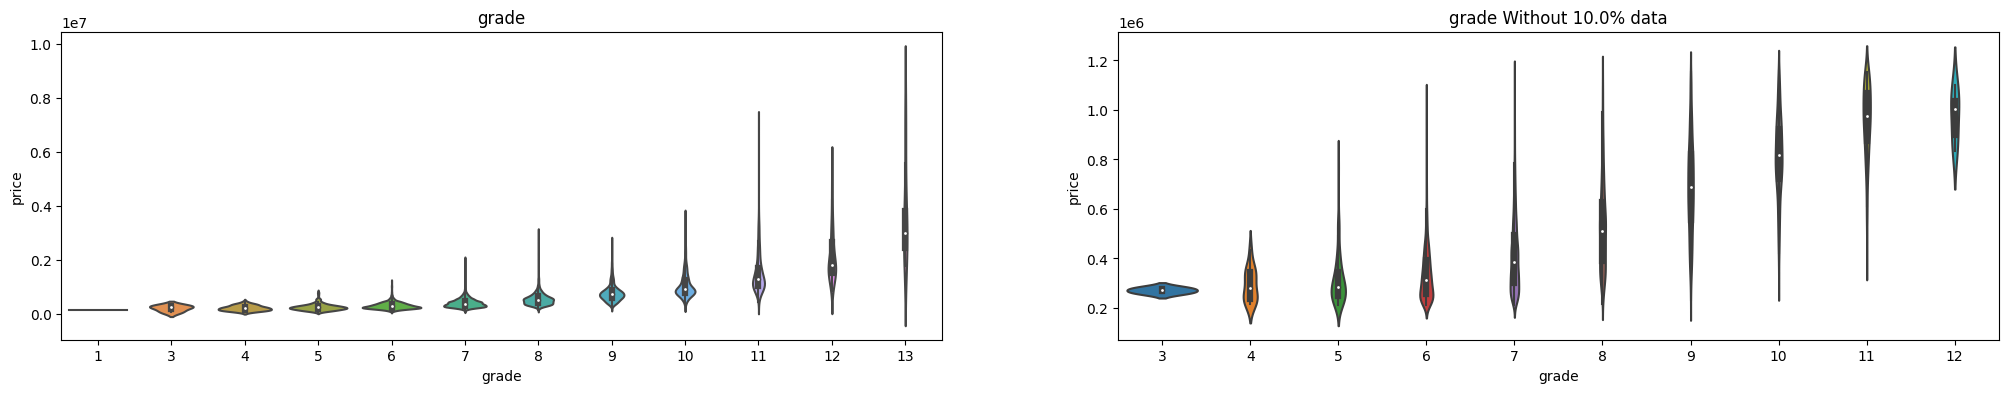

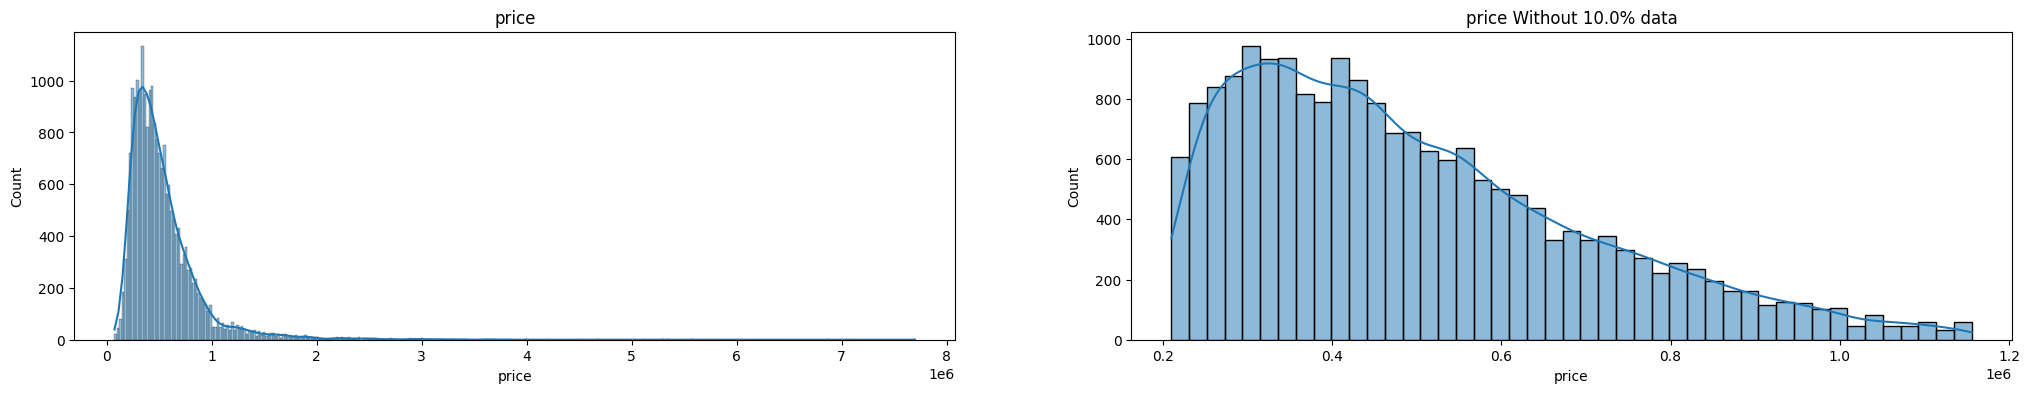

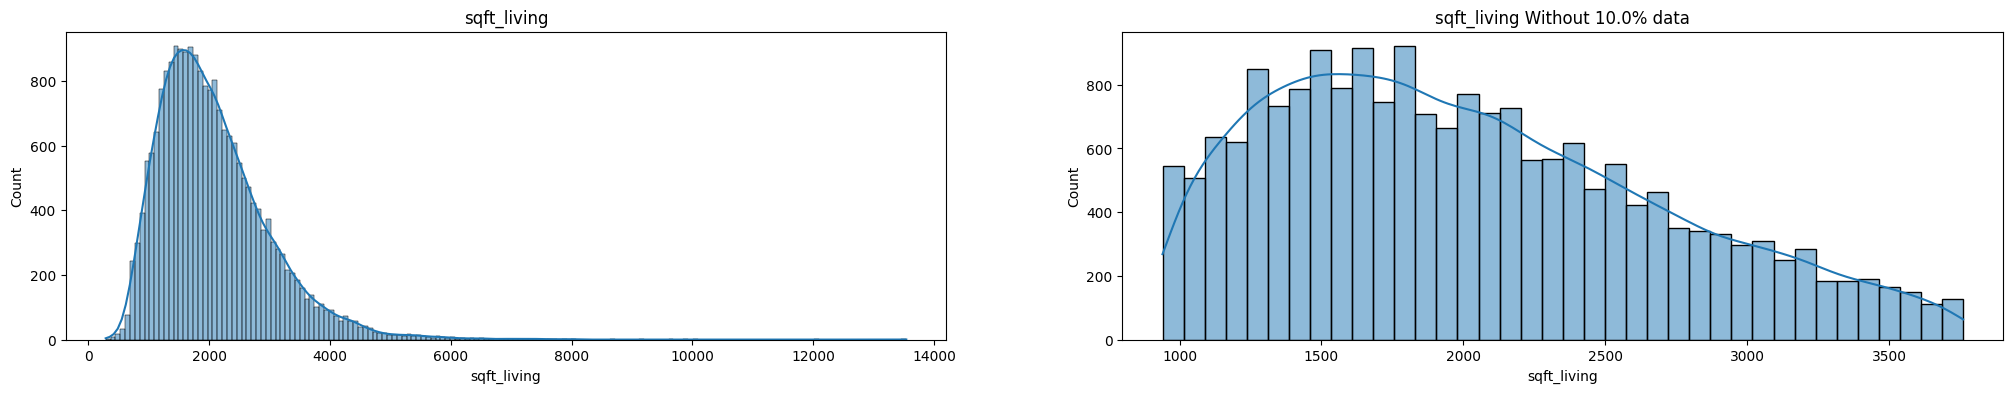

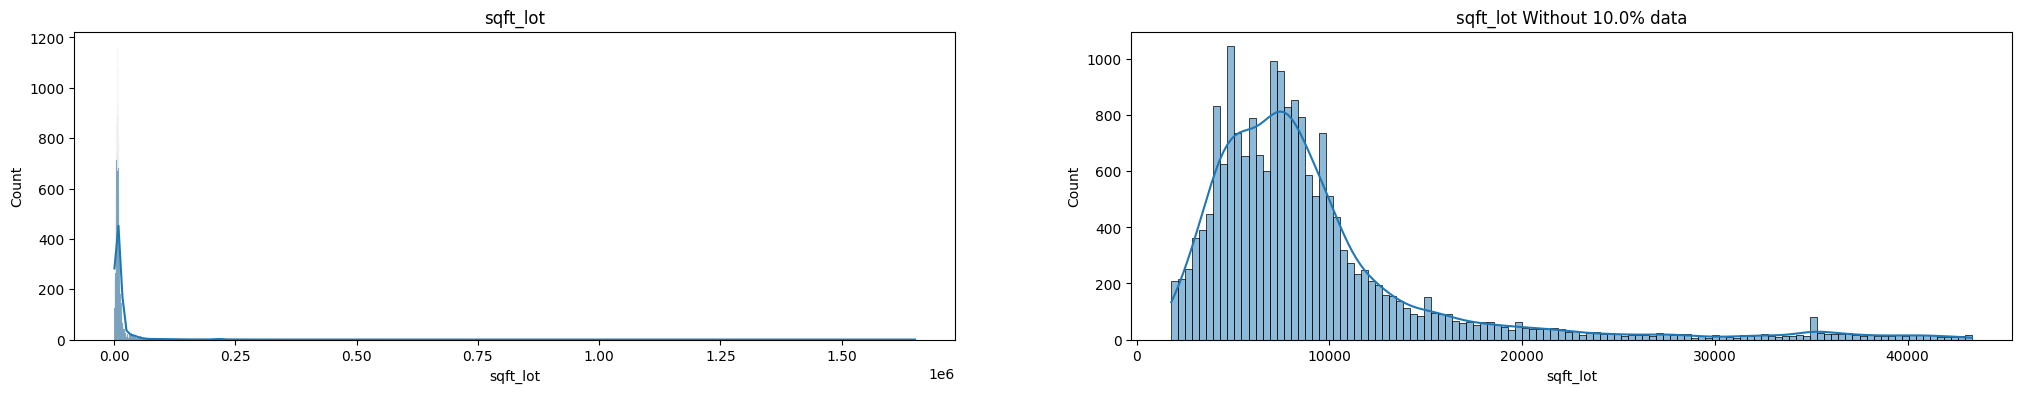

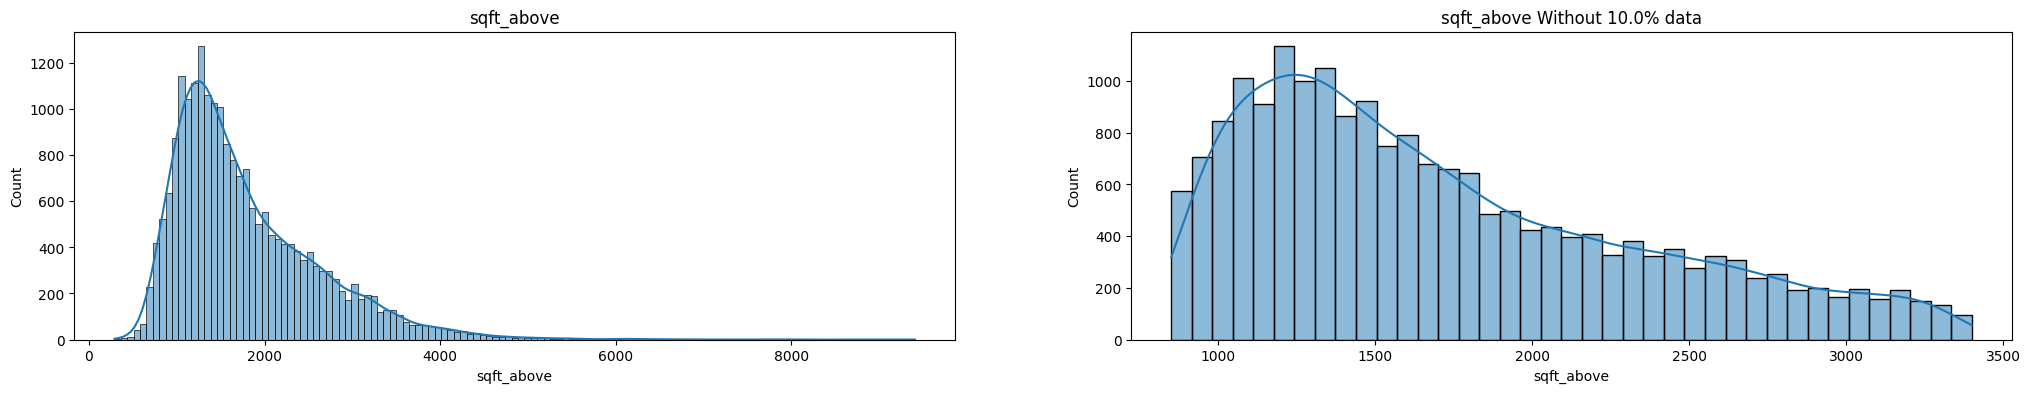

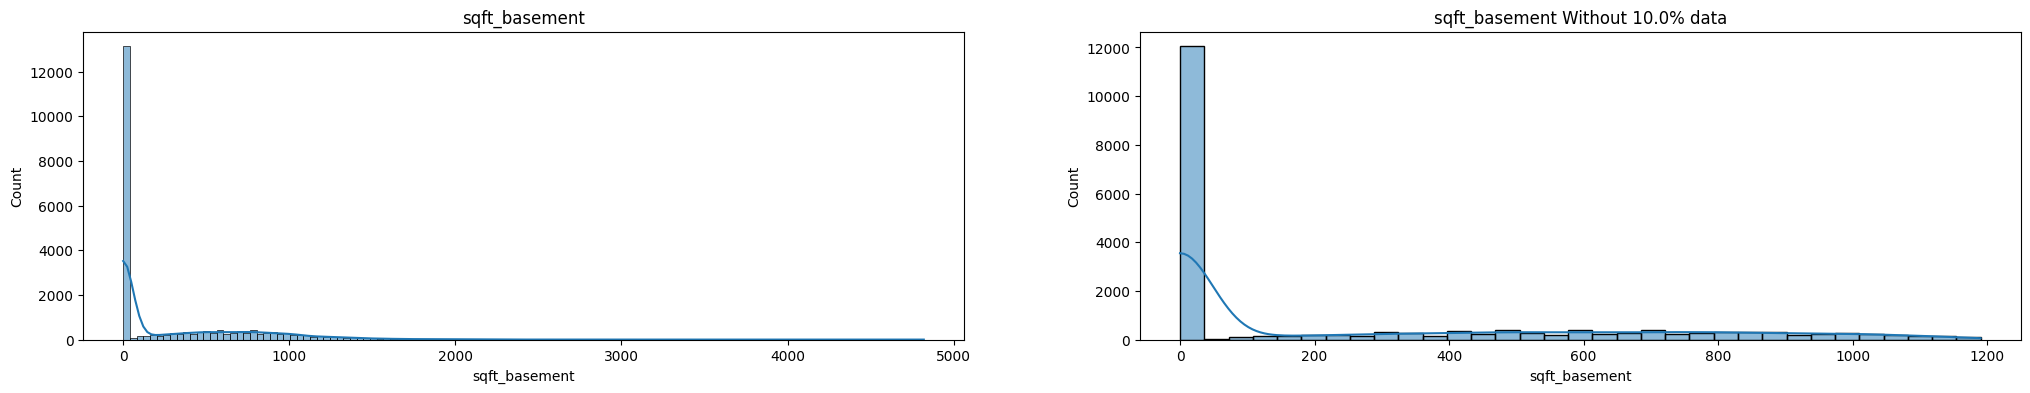

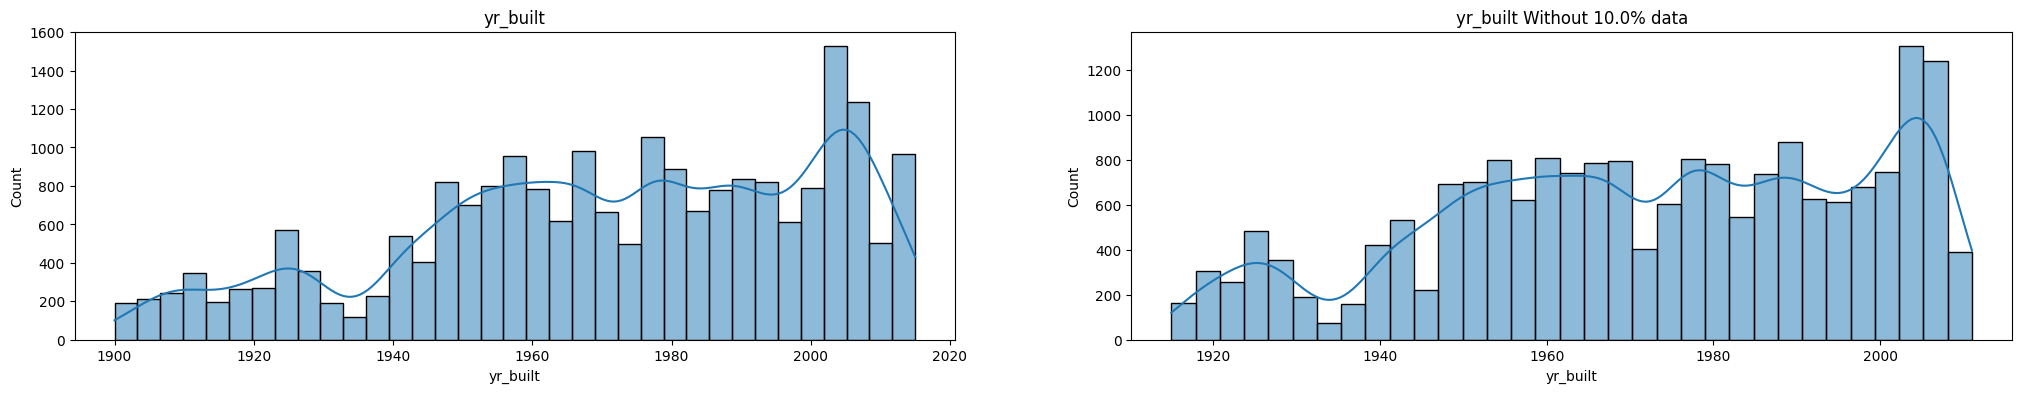

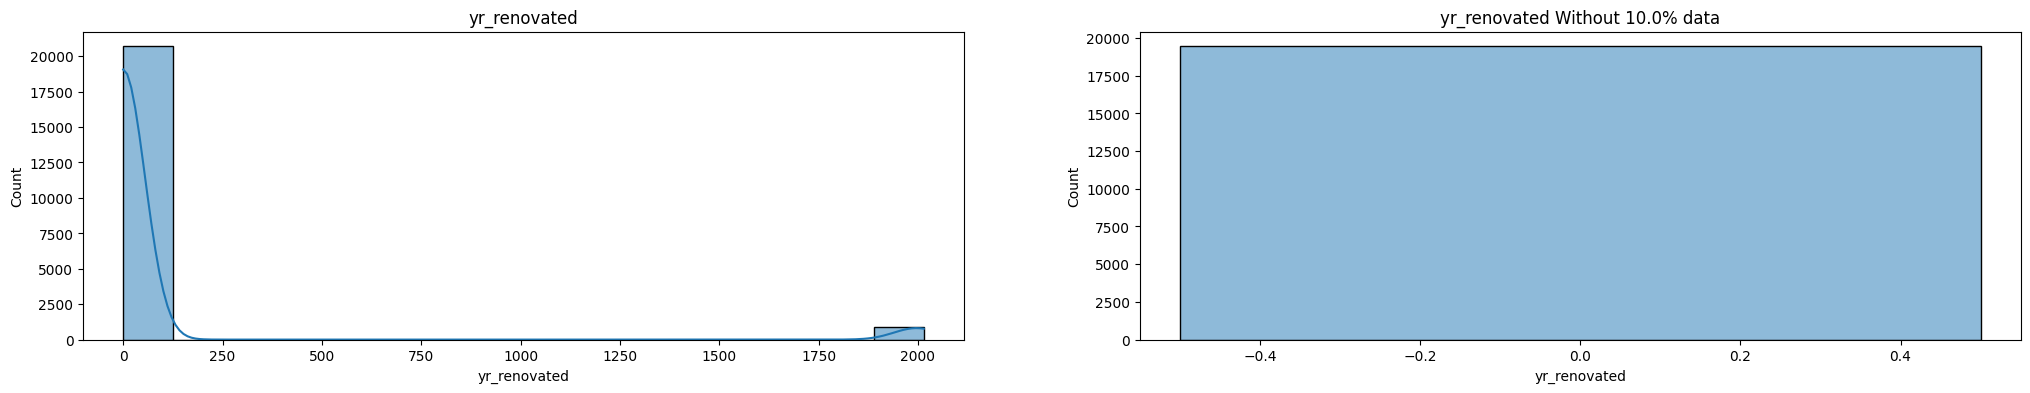

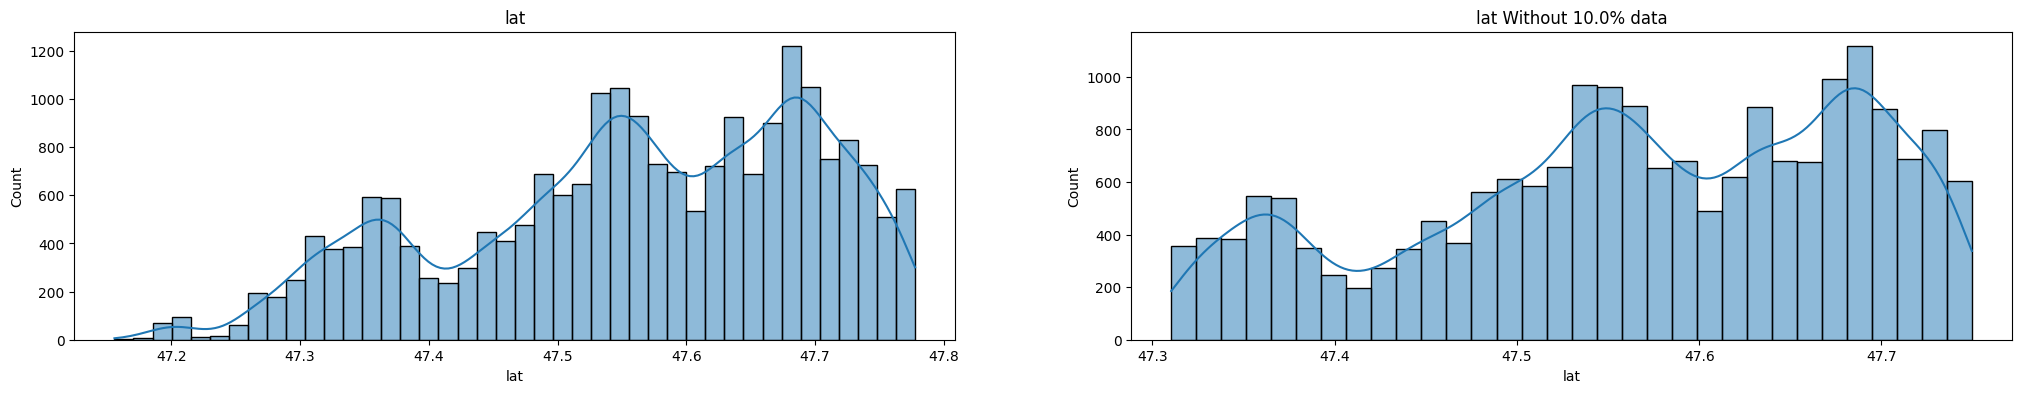

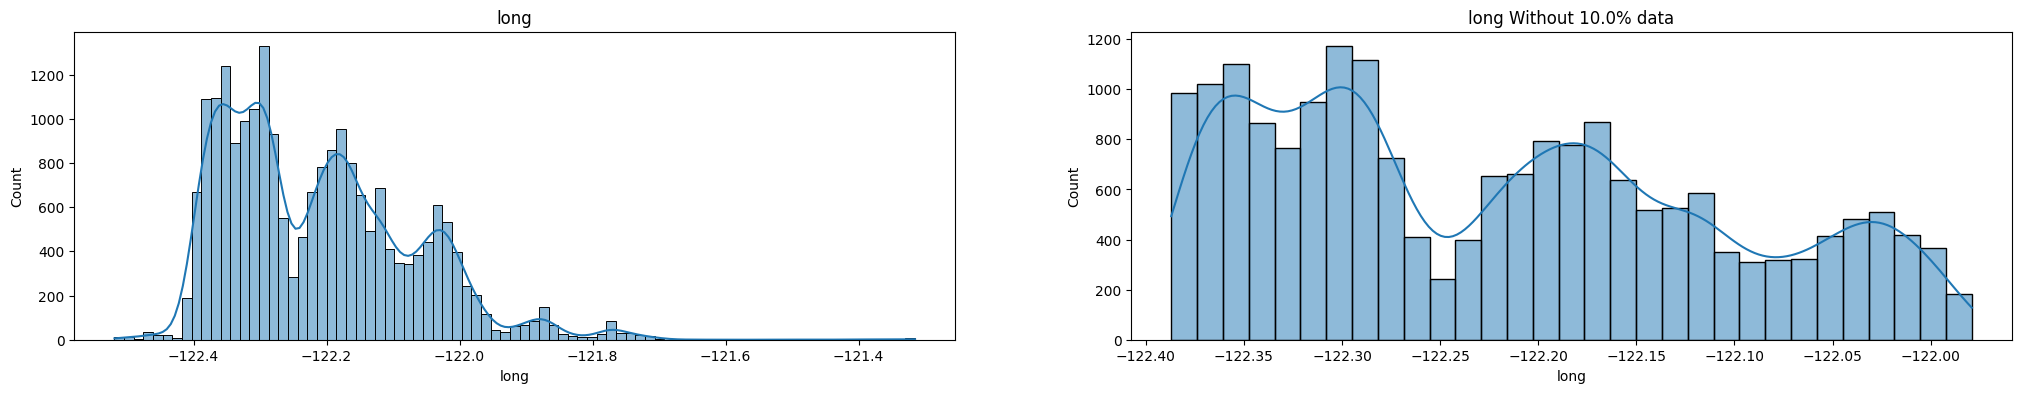

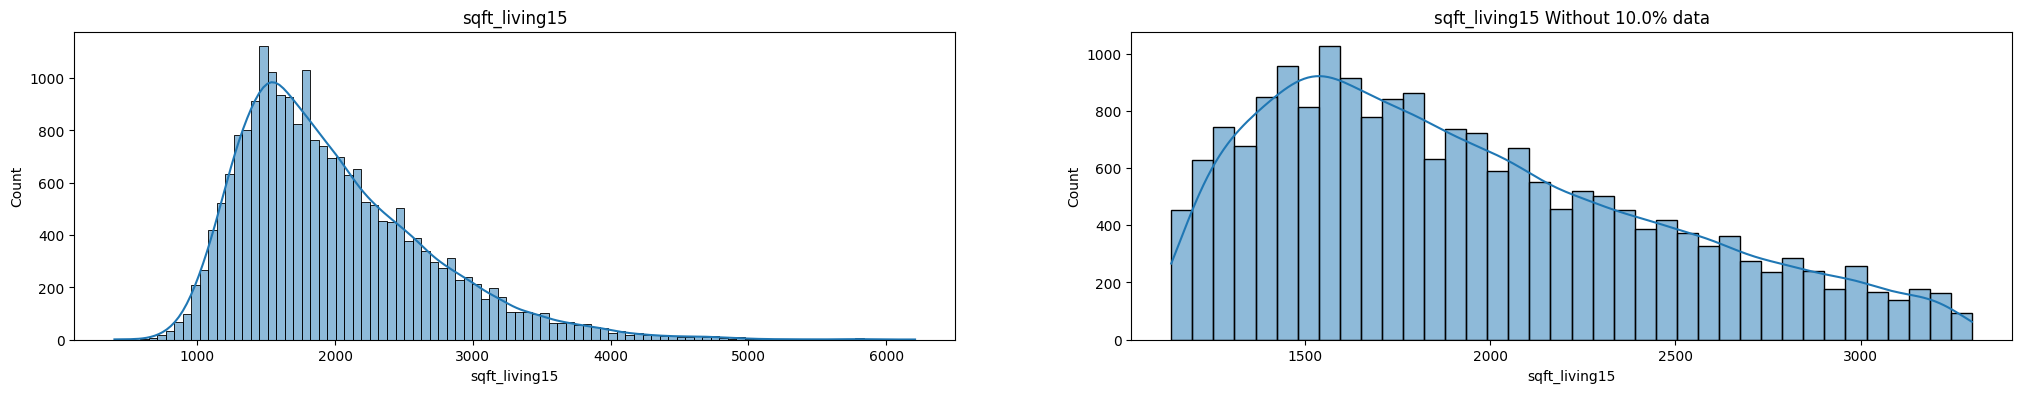

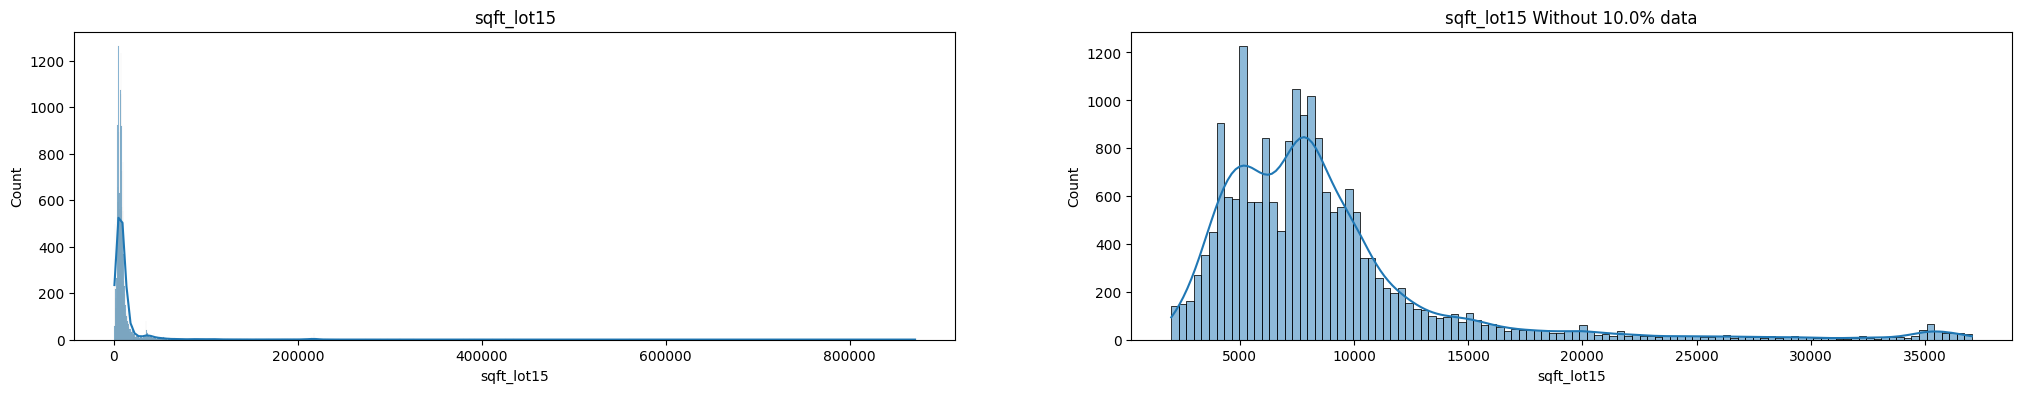

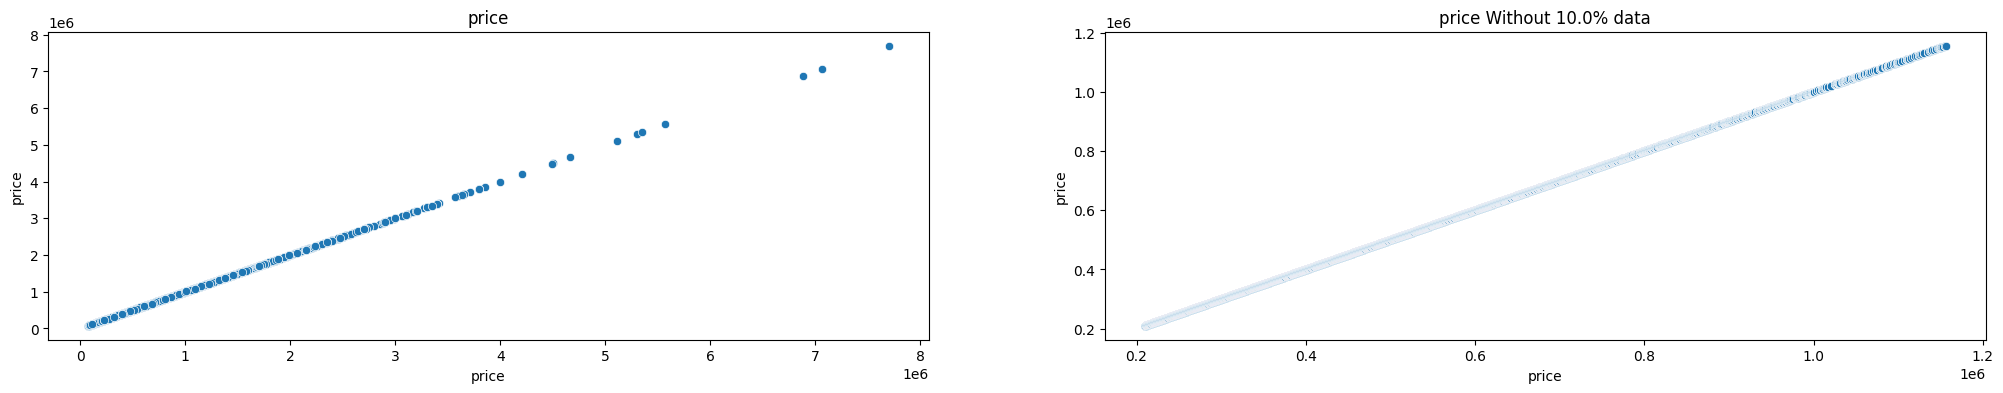

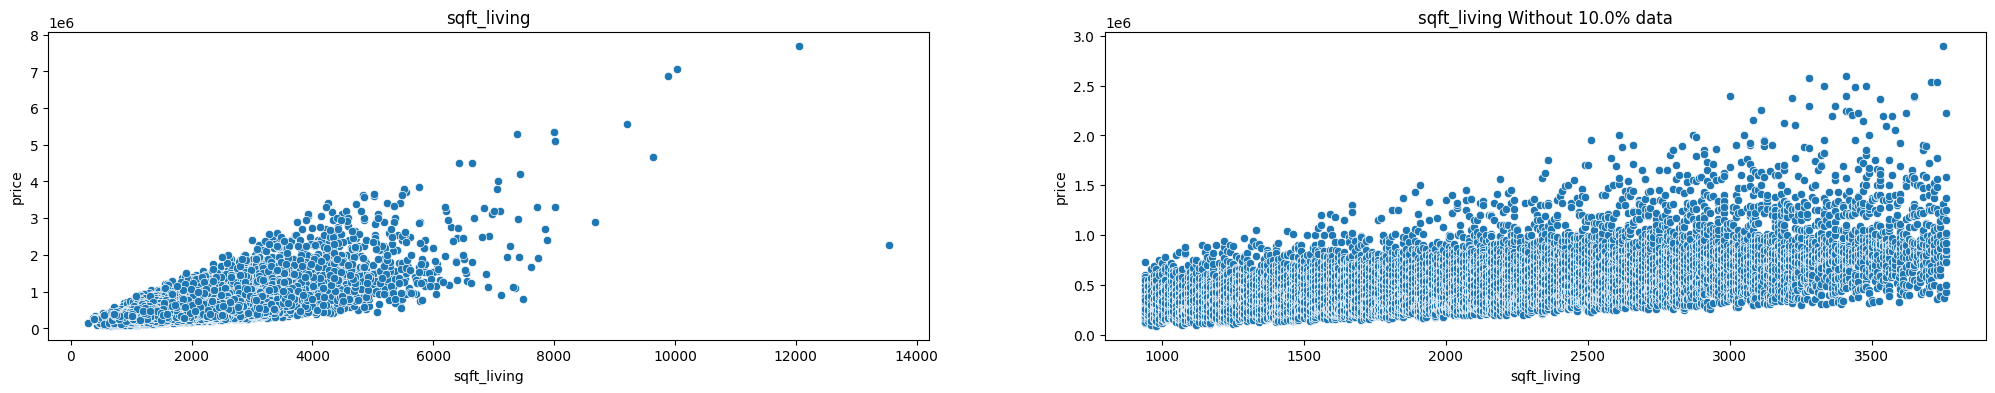

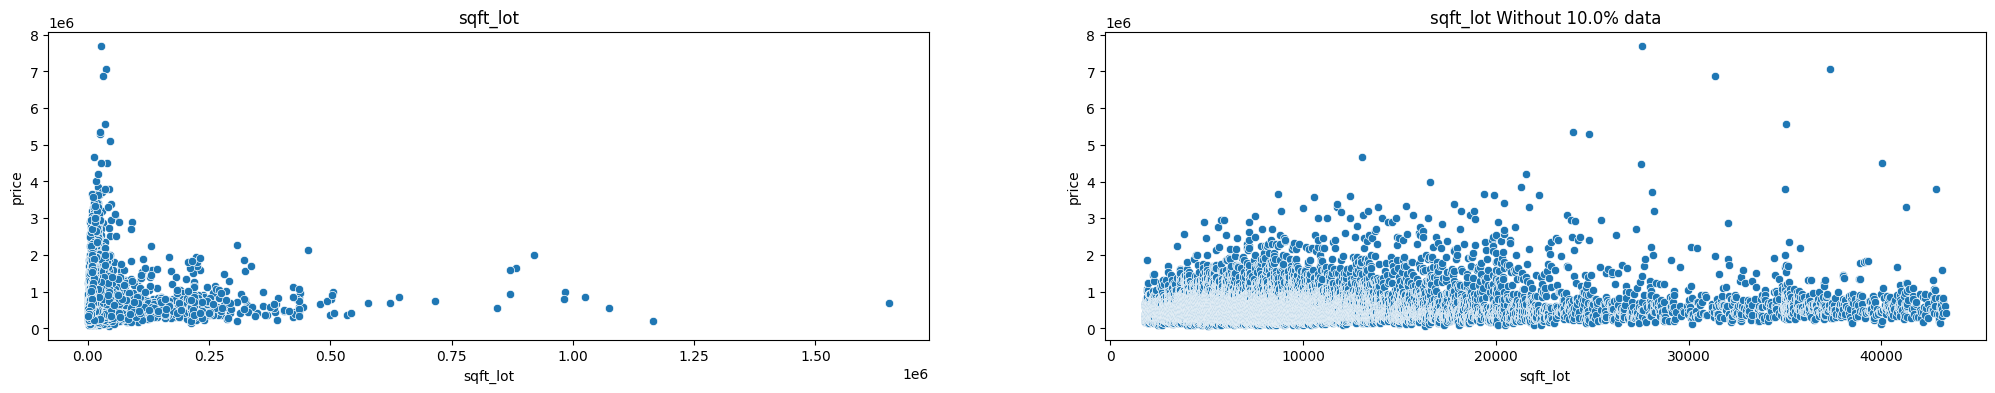

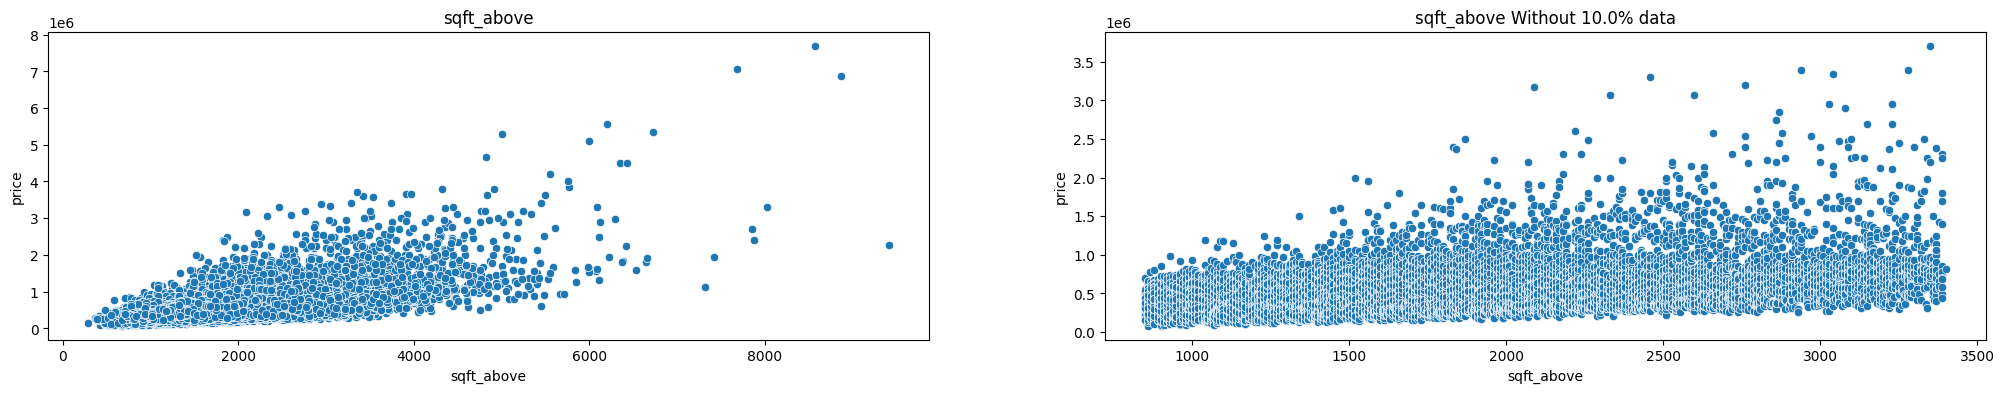

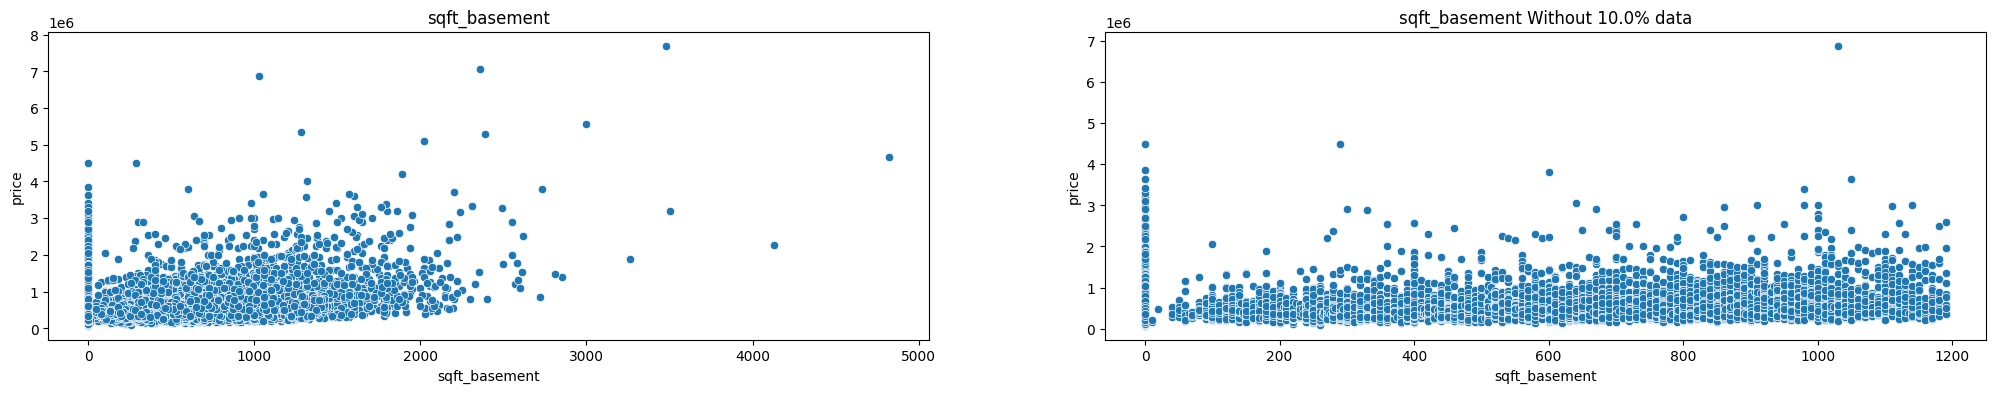

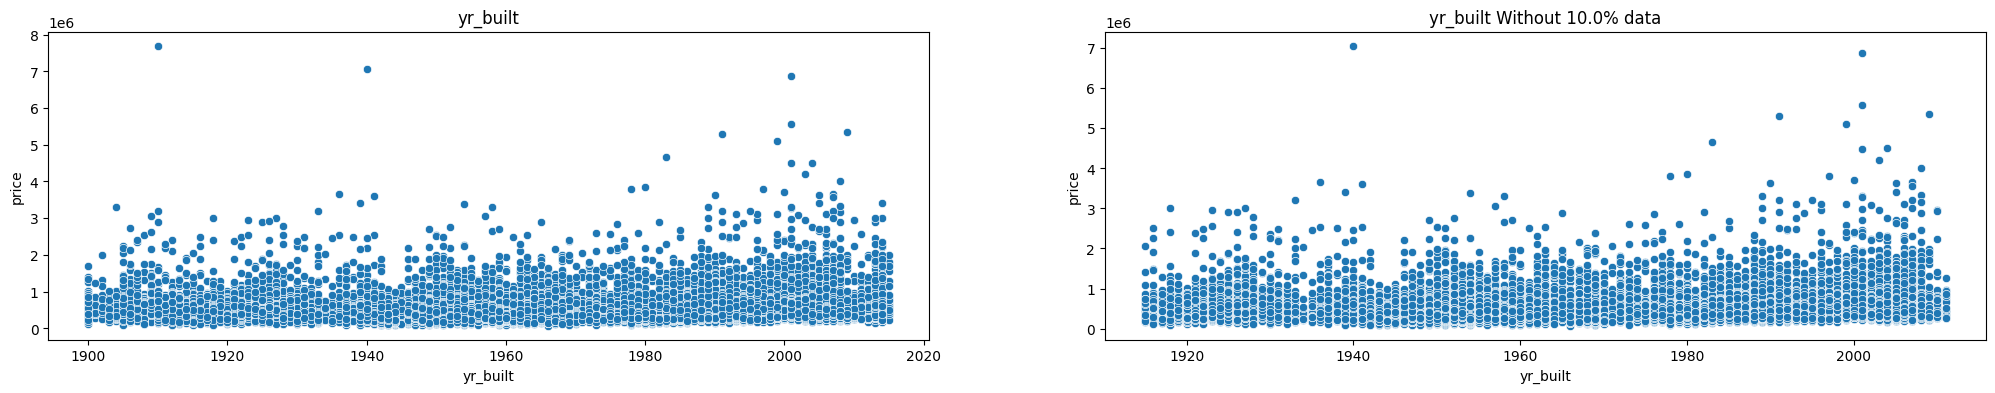

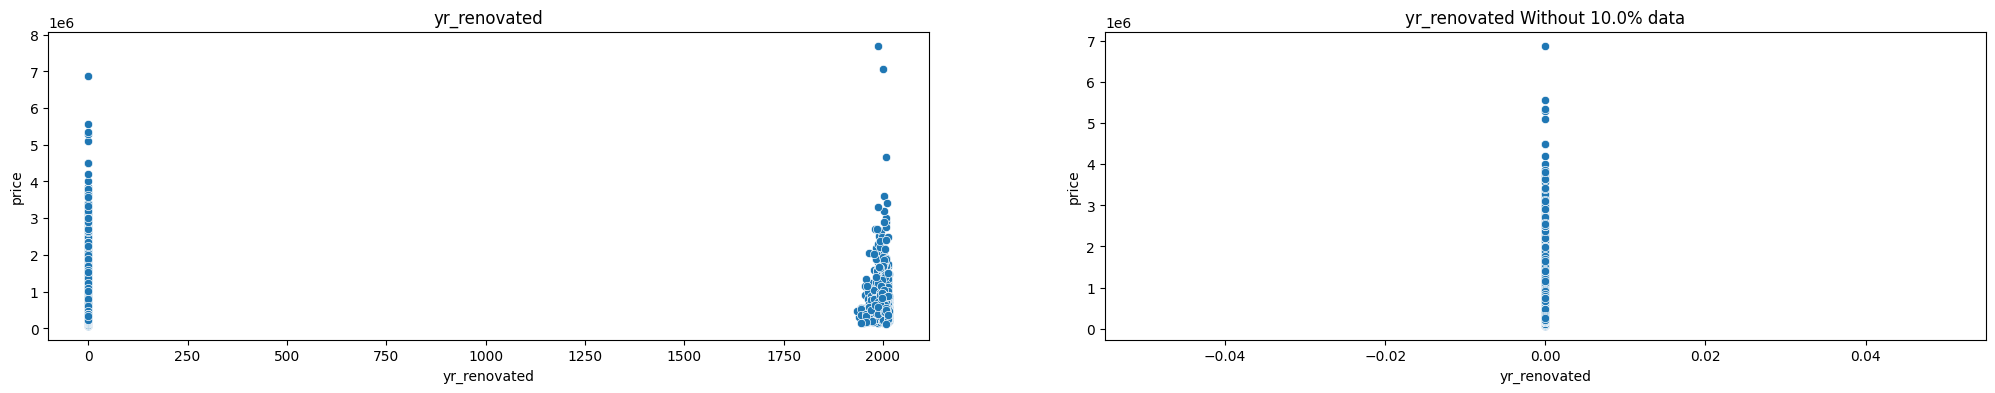

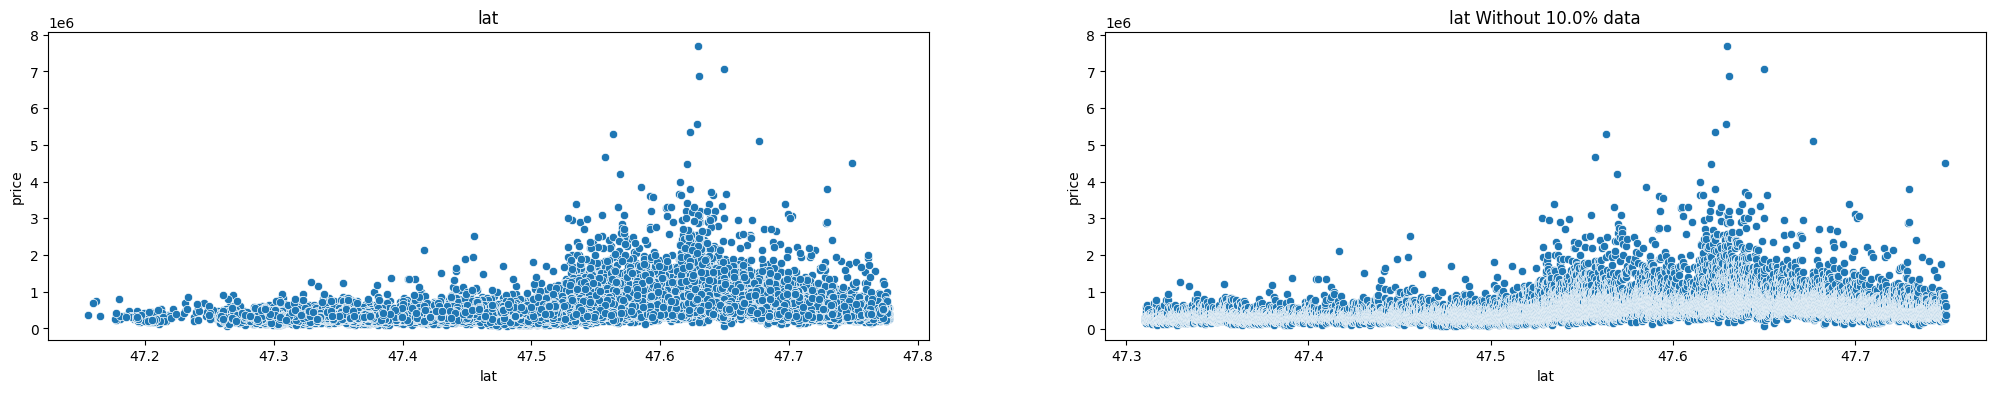

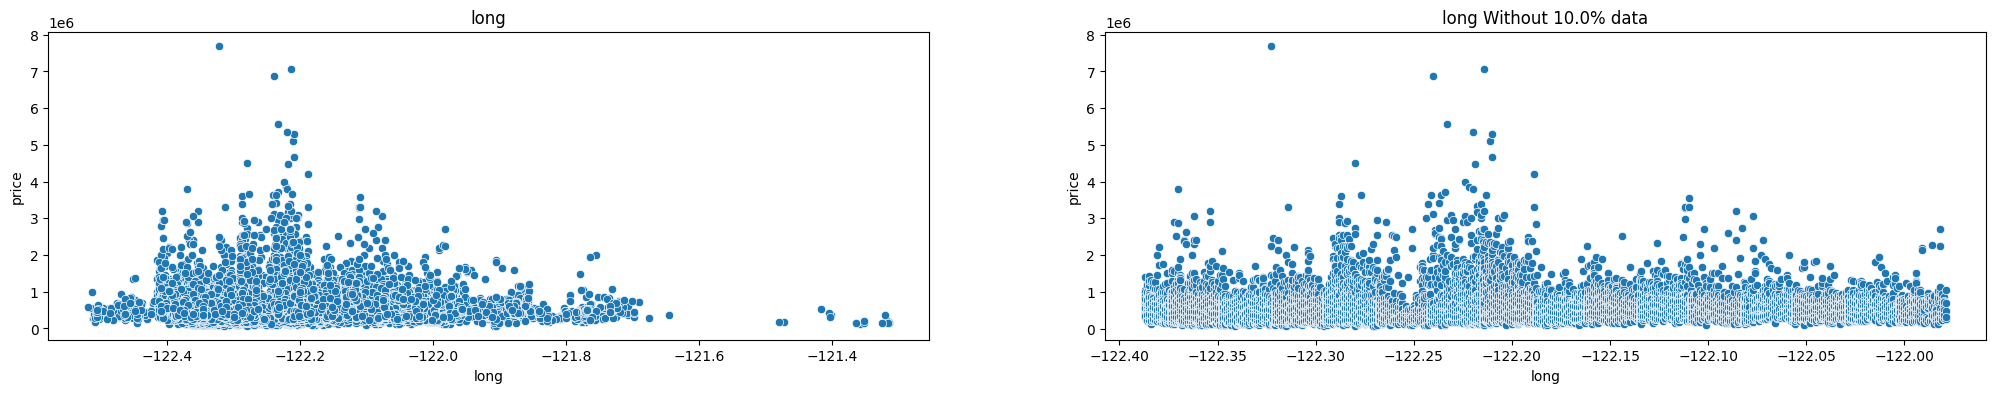

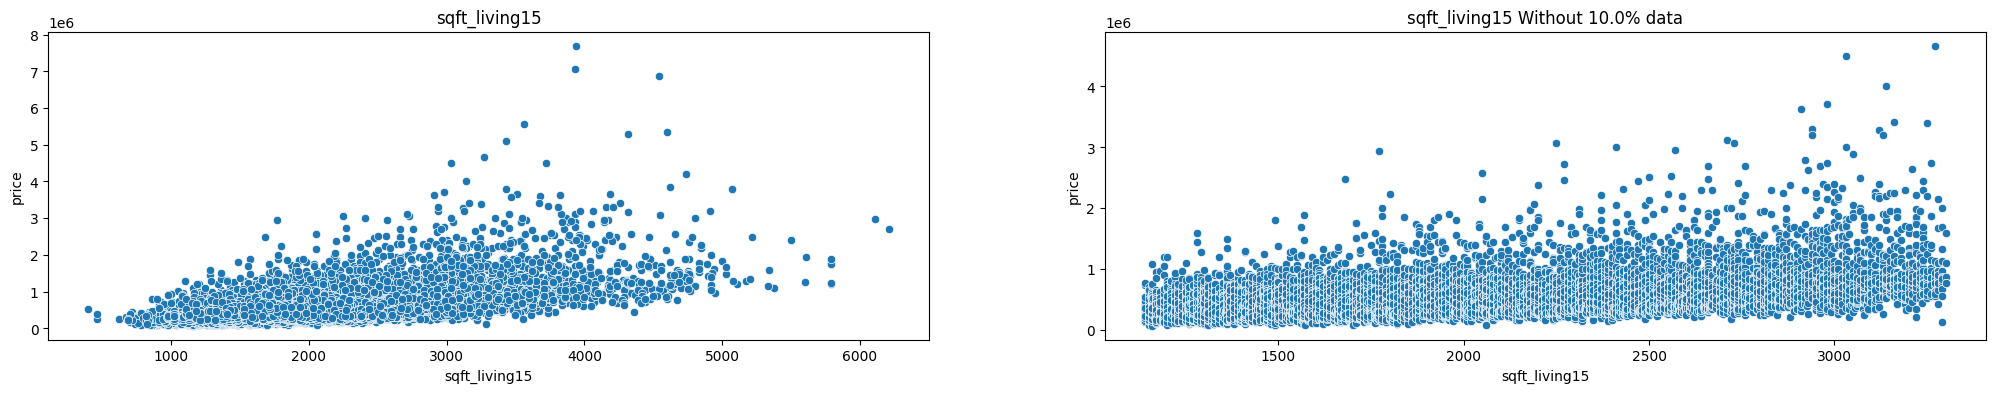

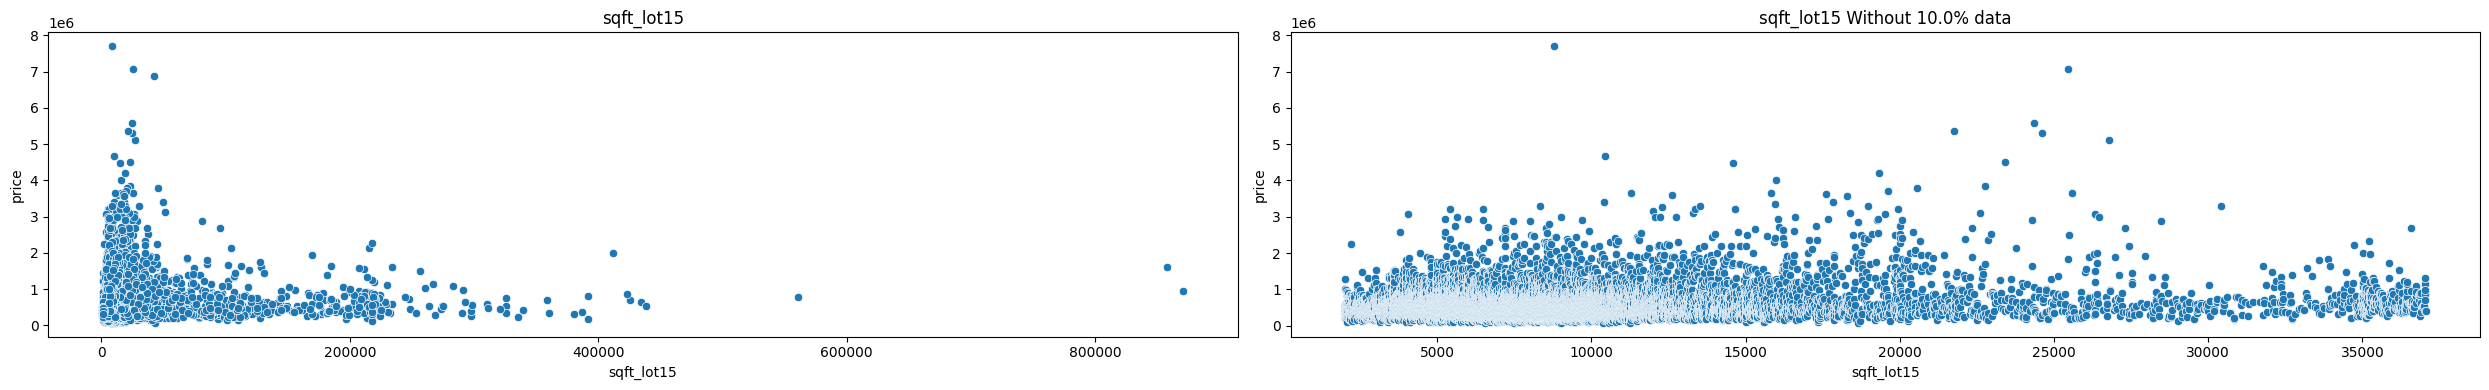

In [ ]:
plot_things()

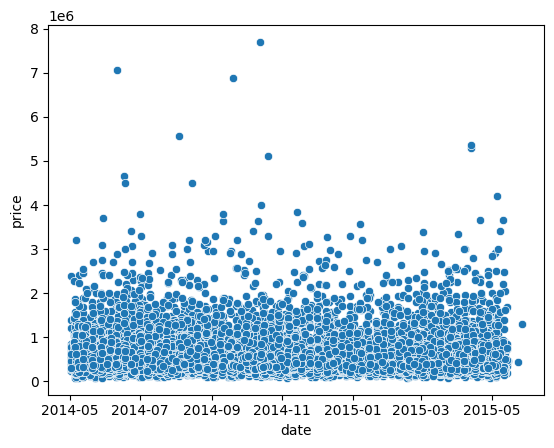

In [ ]:
sns.scatterplot(data = df, x = 'date', y = 'price');

De estas gráficas sacamos conclusiones intuitivas tales como que `grade`, es decir, el nivel de diseño de la casa cuanto mejor es, más cara va a resultar el precio de la misma. También observamos que se construyeron más casas en una época cercana a 2015 y un menor número en 1900, lo que puede resultar en que la mayoría de las casas no se hayan reformado. La variable `sqft_basement` tiene la mayoría de sus valores en 0, es decir, por lo general las casas no tienen sótano. Las variables continuas vemos por lo general que si le excluimos los outlier, los precios no tienen una relación lineal con dichas variables, excepto `sqft_living` que si parece crecer un poco a medida que crece el precio.

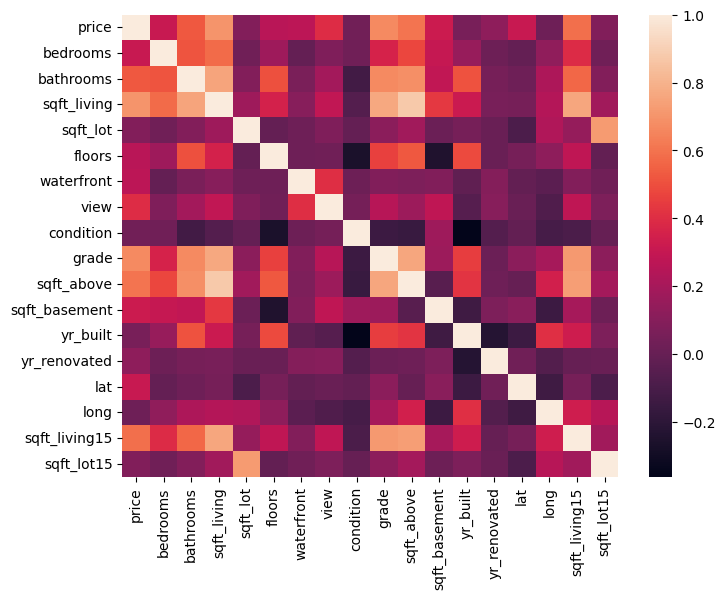

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(df.corr());

In [ ]:
df.corr()['price'].nlargest(10)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
Name: price, dtype: float64

In [ ]:
df.corr(method = 'spearman')['price'].nlargest(10)

price            1.000000
grade            0.658215
sqft_living      0.644191
sqft_living15    0.572290
sqft_above       0.541752
bathrooms        0.497160
lat              0.456409
bedrooms         0.344652
floors           0.322347
view             0.293931
Name: price, dtype: float64

In [ ]:
def lineal_correlation(threshold: float = .8, data: pd.DataFrame = df, method: str = 'pearson') -> dict:
  corr_matrix = data.corr(method = method)

  # Filtrar las parejas de columnas con correlación mayor a threshold
  high_corr_pairs = set()
  columns = corr_matrix.columns
  for i in range(len(columns)):
      for j in range(i+1, len(columns)):
          if abs(corr_matrix.iloc[i,j]) > threshold:
              high_corr_pairs.add((columns[i], columns[j], corr_matrix.iloc[i,j]))

  # Imprimir las parejas de columnas con correlación mayor a threshold
  print(high_corr_pairs)

lineal_correlation(.75)

{('sqft_living', 'sqft_living15', 0.7564202590172237), ('bathrooms', 'sqft_living', 0.7546652789673752), ('sqft_living', 'grade', 0.7627044764584776), ('grade', 'sqft_above', 0.755922937623647), ('sqft_living', 'sqft_above', 0.8765965986813202)}


In [ ]:
lineal_correlation(.75, method = 'spearman')

{('sqft_lot', 'sqft_lot15', 0.922316193937346), ('sqft_living', 'sqft_above', 0.8435037478439347)}


Observamos que `sqft_living` es una variable que se encuentra muy correlacionada con varias variable y es la variable que mayor correlación tiene con `price`, por lo que tendremos que observar como trabajar con esta variable y tal vez si rescindir de otras variables como `sqft_living15`.

Una vez realizado el EDA básico vamos a proceder a realizar el feature engineering para generar nuevas variables y sacar conclusiones sobre que propias variables se pueden descartar.

## Feature engineering

In [ ]:
!pip install feature_engine

In [ ]:
import feature_engine
from feature_engine.datetime import DatetimeFeatures

In [ ]:
date = df[['date']]
dtf = DatetimeFeatures(features_to_extract = ["year", "month", "day_of_month"])
dates = dtf.fit_transform(date)

In [ ]:
df = pd.concat([df, dates], axis = 1).drop(['date'], axis = 1) #Cogemos el año el mes y el día, aunque en principio no vamos a utilizar ninguna.

In [ ]:
years = ['date_year', 'yr_renovated', 'yr_built'] #Creamos la diferencia entre los tres tipos de años que tenemos

for cnt, year in enumerate(years):
  i = cnt
  while i + 1 < len(years):
    df[f'{year}_{years[i + 1]}'] = df[year] - df[years[i + 1]]
    i += 1

In [ ]:
df['yr_renovated_yr_built'] = df['yr_renovated_yr_built'].apply(lambda x: x if x > 0 else 0) #0 no renovado, !0 diferencia de renovacion
df['date_year_yr_renovated'] = df['date_year_yr_renovated'].apply(lambda x: 0 if x > 2013 else x)

In [ ]:
years = ['yr_renovated_yr_built', 'date_year_yr_renovated', 'date_year_yr_built']

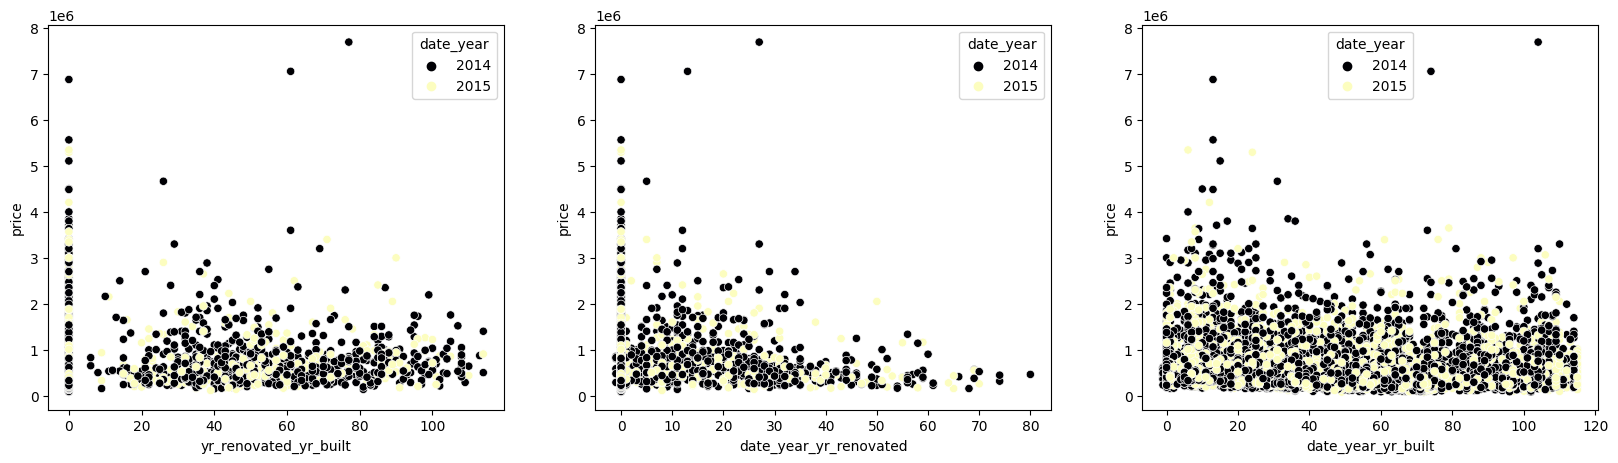

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))

for cnt, col in enumerate(years):
  sns.scatterplot(df, x = col, y = 'price', ax = axes[cnt], hue = 'date_year', palette = 'magma');

No sacamos en conclusión muchas cosas de estos gráficos, más allá de que si la reforma ha sido hace pocos años (10-20) el precio puede verse incrementado.

Vamos a pasar la latitud y longitud a coordenadas polares, recordemos que se definen, donde x = longitud(en este caso siempre negativo) e y = latitud de la siguiente forma:

$$p = \sqrt{x^2 + y^2}$$ \\
$$θ = arctan(y/x) + \pi$$

In [ ]:
df['θ'] = np.arctan(df['lat']/df['long']) + np.pi
df['p'] = np.sqrt(df['lat']**2 + df['long']**2)

In [ ]:
df.drop(['lat', 'long'], axis = 1, inplace = True) #Tiramos la latitud y longitud ya que tenemos su versión en coordenadas polares.

In [ ]:
df = df.sort_values(by = ['date_year', 'date_month', 'date_day_of_month']) #Ordenamos el dataset para el entrenamiento

In [ ]:
df.drop(['date_year', 'date_month', 'date_day_of_month'], axis = 1, inplace = True)

In [ ]:
df.drop(['yr_built', 'yr_renovated'], axis = 1, inplace = True) #Tiramos estas variables ya que con las 3 variables creadas recogemos toda la información.

In [ ]:
df['bed_over_bath'] = (df['bedrooms']/df['bathrooms']).fillna(df['bedrooms']) #Creamos la variable cuantas habitaciones corresponden por baños.

In [ ]:
df['bed_over_bath'] = np.where(np.isinf(df['bed_over_bath']), df['bedrooms'], df['bed_over_bath'])

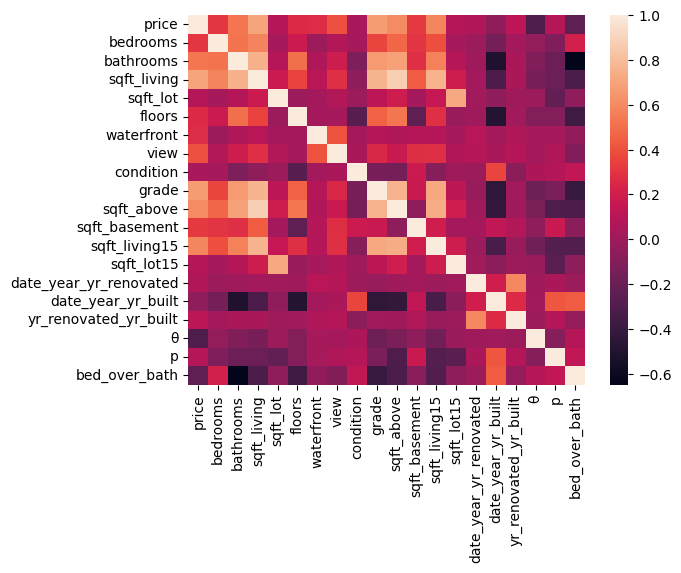

In [ ]:
sns.heatmap(df.corr()); #De momento decidimos quedarnos con estas variables para las predicciones aunque haya algunas altamente correladas como hemos visto anteriormente.

## Entrenamiento e inferencia

Como tenemos el dataset ordenado, nos interesa dividir el conjunto test con las ventas más recientes (no queremos una m.a.s.), ya que los datos más recientes son los más representativos y los que verdaderamente nos interesa predecir, queríamos darle un toque a sabor negocio.

In [ ]:
train, test = df[:17000], df[17000:] 

In [ ]:
X_train, X_test, y_train, y_test = train.drop(['price'], axis = 1), test.drop(['price'], axis = 1), train['price'], test['price']

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.neighbors import KNeighborsRegressor

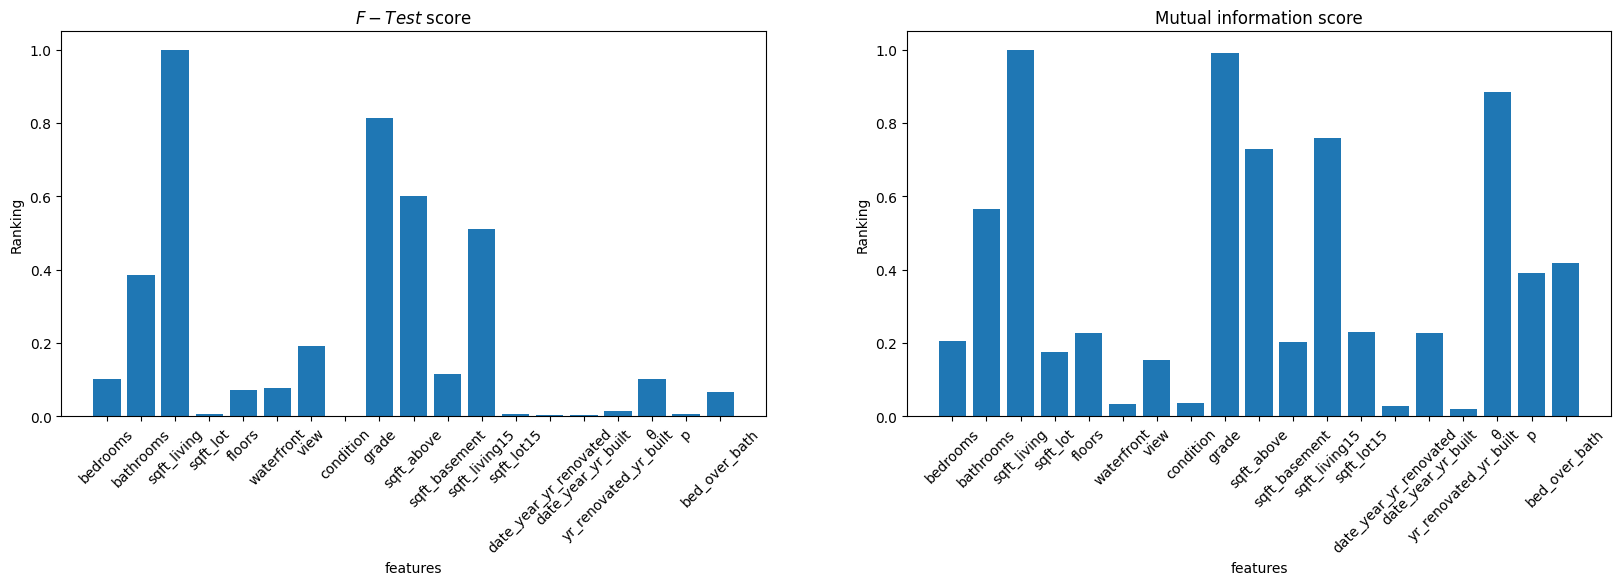

In [ ]:
f_test, _ = f_regression(X_train, y_train)
f_test /= np.max(f_test)

mi = mutual_info_regression(X_train, y_train)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X_train.shape[1]),f_test,  align="center")
plt.xticks(range(X_train.shape[1]),X_train.columns, rotation = 45)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F-Test$ score')

plt.subplot(1,2,2)
plt.bar(range(X_train.shape[1]),mi,  align="center")
plt.xticks(range(X_train.shape[1]),X_train.columns, rotation = 45)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

In [ ]:
def columns_to_drop(f_test, mi, data: pd.DataFrame = X_train, threshold: float = .1):

  ''' 
  Funcion para devolver aquellas variables que apenas aportan en ambos test.
'''
  drop = []
  cnt = 0
  for f, mut in zip(f_test, mi):
    if f < threshold and mut < threshold:
      drop.append(data.columns[cnt])
    cnt += 1
  return drop

dropped = columns_to_drop(f_test, mi)
print(dropped)

['waterfront', 'condition', 'date_year_yr_renovated', 'yr_renovated_yr_built']


In [ ]:
X_train.drop(dropped, axis = 1, inplace = True) 
X_test.drop(dropped, axis = 1, inplace = True)

In [ ]:
%%time

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()), 
    ('model', RandomForestRegressor(n_jobs = -1, random_state = 42))
])

param_grid = {
    'pca__n_components': [2, 3, 4, 5, 6, None], 'model': [RandomForestRegressor(n_jobs = -1, random_state = 42)],
    'model__n_estimators': [50, 100], 'model__max_depth': [5, 7, 10],
    'scaler': [StandardScaler(), MinMaxScaler(), None]
},
{
    'pca__n_components': [2, 3, 4, 5, 6, None], 'model': [KNeighborsRegressor(n_jobs = -1)],
    'model__n_neighbors': [3, 5, 7, 9], 'model__p': [1, 2, np.inf],
    'scaler': [StandardScaler(), MinMaxScaler(), None]
}

r_search = RandomizedSearchCV(pipe, param_distributions = param_grid,
                                n_iter = 20, cv = 5, scoring= 'neg_mean_squared_error')

# 20 * 5 iteraciones

r_search.fit(X_train, y_train)

CPU times: user 37.1 s, sys: 17 s, total: 54.1 s
Wall time: 6min 5s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('pca', PCA()),
                                             ('model',
                                              RandomForestRegressor(n_jobs=-1,
                                                                    random_state=42))]),
                   n_iter=20,
                   param_distributions=({'model': [RandomForestRegressor(max_depth=10,
                                                                         n_estimators=50,
                                                                         n_jobs=-1,
                                                                         random_state=42)],
                                         'model__max_depth': [5, 7, 10],
                                         'model__n_estimators': [50, 100],
                                         'pca__n_components': [2, 3, 4, 5, 6,
                                                               None],
                                         'scaler': [StandardScaler(),
                                                    MinMaxScaler(), None]},),
                   scoring='neg_mean_squared_error')

In [ ]:
r_search.best_params_

{'scaler': None,
 'pca__n_components': None,
 'model__n_estimators': 50,
 'model__max_depth': 10,
 'model': RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)}

In [ ]:
r_search.best_score_

-29043170772.5559

In [ ]:
y_pred_train = r_search.best_estimator_.predict(X_train)
y_pred = r_search.best_estimator_.predict(X_test)

In [ ]:
def regression_metrics():
  metrics = [r2_score, mean_absolute_error, mean_squared_error]
  names = ['r2', 'mae', 'rmse']
  for cnt, metric in enumerate(metrics):
    if metric == mean_squared_error:
      print(f'\033[1m{names[cnt]}\033[0m  \n -> Train: {metric(y_train, y_pred_train, squared = False)}\n -> Test: {metric(y_test, y_pred, squared = False)}')
    else:
      print(f'\033[1m{names[cnt]}\033[0m  \n -> Train: {metric(y_train, y_pred_train)}\n -> Test: {metric(y_test, y_pred)}')

Recordemos: 

$$R^2 = 1 - \frac{\sum_{i = 1}^{n}{(y_i - \hat{y_i})^2}}{\sum_{i = 1}^{n}{(y_i - \overline{y_i})^2}}$$
$$MAE = \sum_{i = 1}^{n}\frac{|y_i - \hat{y_i}|}{n}$$
$$RMSE = \sqrt{\sum_{i = 1}^{n}\frac{(y_i - \hat{y_i})^2}{n}}$$

In [ ]:
regression_metrics()

r2  
 -> Train: 0.9107872303555854
 -> Test: 0.7720667905549152
mae  
 -> Train: 71962.18958566267
 -> Test: 100256.67707734971
rmse  
 -> Train: 109581.59615441319
 -> Test: 175553.83946863396


Se ha tratado de reducir el overfitting lo más posible, ya que si tomábamos valores de `max_depth` mayores (como 20), aunque se mejorasen los resultados en el conjunto de test, la distancia entre train y test era mayor, por tanto nos decantamos por escoger una profundidad menor cuidando el overfitting.

## Análisis del modelo y conclusiones

En esta última parte nos centraremos en determinar la importancia que da el modelo a cada variable y observar si se corresponde con las ideas intuitivas que teníamos anteriormente.

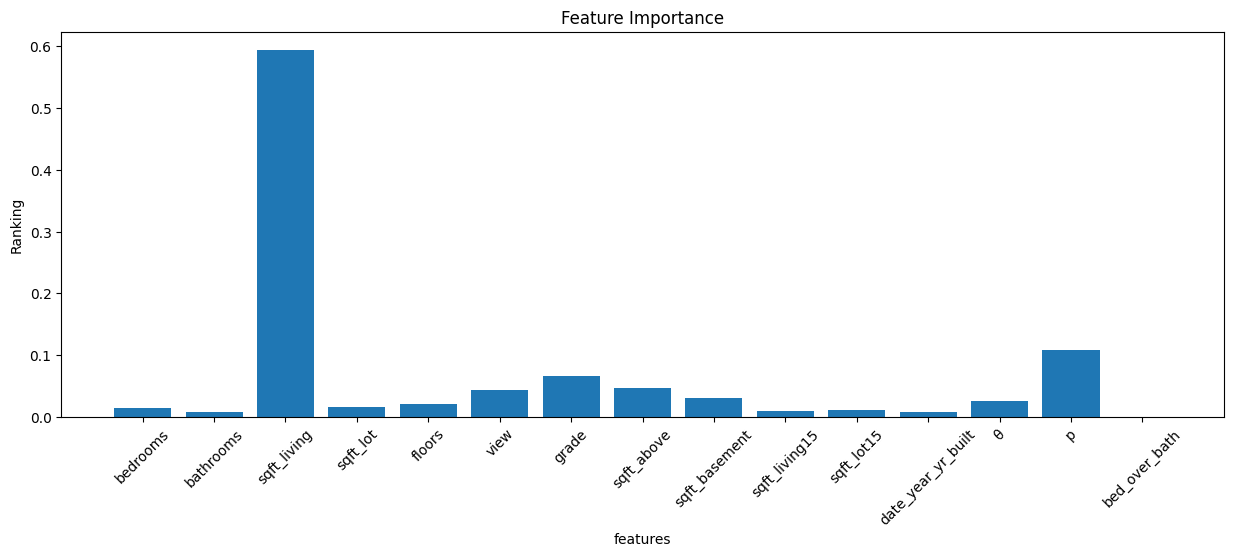

In [ ]:
plt.figure(figsize = (15, 5))

plt.bar(range(X_train.shape[1]), r_search.best_estimator_._final_estimator.feature_importances_,  align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation = 45)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Feature Importance')

plt.show()

Como observamos en la imagen, la variable que claramente tiene más peso en la toma de decisión es `sqft_living` que a la vez es la que tenía una mayor relación lineal con la variable objetivo. El resto de variables prácticamente no tienen importancia aunque cabe destacar que `p` (el módulo de las coordenadas) ha conseguido ser algo relevante a la hora de predicciones. Por último, la variable creada por nosotros de dormitorios sobre baños no tiene nada de importancia en el modelo y la podríamos eliminar.